# Feature engineering

*Prepare our Data for Machine Learning Algorithms*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly_express as px
import plotly.graph_objects as go
sns.set()
from pandas.io.json import json_normalize 

In [2]:
df1 = pd.read_csv('./car rental turo.csv')
df1.drop("Unnamed: 0", axis=1, inplace=True)
df1.head()

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,averageDailyPrice,scalar,city,longitude,latitude,state,model,make,id,listingCreatedTime,year,type,automaticTransmission
0,NaN,0,0,0.0,False,False,False,29.0,11,Iowa Falls,-93.265547,42.522726,IA,Fusion,Ford,58905,1406583813000,2014,car,True
1,5.00,1,1,100.0,False,False,True,162.0,8,Marshall,-95.789869,44.433663,MN,718 Boxster,Porsche,403202,1523137713000,2017,car,True
2,NaN,0,0,NaN,False,False,True,40.0,5,Colliers,-80.559747,40.351722,WV,Cruze,Chevrolet,320436,1505356047000,2014,car,True
3,3.75,4,5,100.0,False,False,True,99.0,19,Moon,-80.222071,40.518838,PA,6 Series,BMW,350460,1512018225000,2006,car,True
4,NaN,0,0,NaN,False,False,False,81.0,17,Pittsburgh,-80.241361,40.495285,PA,Explorer,Ford,429146,1527170872000,2017,suv,True


1-Convert to datetime type

the time of listing of the car was provided in the form of an EPOCH, and required the usage of the datetime package in Python in order to render and extract useful features from it.

In [3]:
df1['listingCreatedTime'] = pd.to_datetime(df1['listingCreatedTime'],unit='ms')
df1.head()

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,averageDailyPrice,scalar,city,longitude,latitude,state,model,make,id,listingCreatedTime,year,type,automaticTransmission
0,NaN,0,0,0.0,False,False,False,29.0,11,Iowa Falls,-93.265547,42.522726,IA,Fusion,Ford,58905,2014-07-28 21:43:33,2014,car,True
1,5.00,1,1,100.0,False,False,True,162.0,8,Marshall,-95.789869,44.433663,MN,718 Boxster,Porsche,403202,2018-04-07 21:48:33,2017,car,True
2,NaN,0,0,NaN,False,False,True,40.0,5,Colliers,-80.559747,40.351722,WV,Cruze,Chevrolet,320436,2017-09-14 02:27:27,2014,car,True
3,3.75,4,5,100.0,False,False,True,99.0,19,Moon,-80.222071,40.518838,PA,6 Series,BMW,350460,2017-11-30 05:03:45,2006,car,True
4,NaN,0,0,NaN,False,False,False,81.0,17,Pittsburgh,-80.241361,40.495285,PA,Explorer,Ford,429146,2018-05-24 14:07:52,2017,suv,True


In [4]:
df1['listingyear'] = df1['listingCreatedTime'].dt.year
df1['month'] = df1['listingCreatedTime'].dt.month
df1['weekday'] = df1['listingCreatedTime'].dt.dayofweek
df1.head()

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,averageDailyPrice,scalar,city,...,model,make,id,listingCreatedTime,year,type,automaticTransmission,listingyear,month,weekday
0,NaN,0,0,0.0,False,False,False,29.0,11,Iowa Falls,...,Fusion,Ford,58905,2014-07-28 21:43:33,2014,car,True,2014,7,0
1,5.00,1,1,100.0,False,False,True,162.0,8,Marshall,...,718 Boxster,Porsche,403202,2018-04-07 21:48:33,2017,car,True,2018,4,5
2,NaN,0,0,NaN,False,False,True,40.0,5,Colliers,...,Cruze,Chevrolet,320436,2017-09-14 02:27:27,2014,car,True,2017,9,3
3,3.75,4,5,100.0,False,False,True,99.0,19,Moon,...,6 Series,BMW,350460,2017-11-30 05:03:45,2006,car,True,2017,11,3
4,NaN,0,0,NaN,False,False,False,81.0,17,Pittsburgh,...,Explorer,Ford,429146,2018-05-24 14:07:52,2017,suv,True,2018,5,3


In [5]:
# what is the date range?
print('begin: {0}, end: {1}'.format(df1.listingCreatedTime.min(), df1.listingCreatedTime.max()))

begin: 2012-12-04 19:12:46, end: 2018-07-08 01:46:21


Let's ask ourselves a question here, is the same car model the same price in all states, or is there a difference in prices ?

In [6]:
tab1=df1.groupby(["make","model", "year","state"]).agg({'averageDailyPrice': ['min', 'max']})
tab1.sort_values(['model',"year"], ascending=[True,True], inplace=True)
tab1.head(35)

averageDailyPrice       
                                         min    max
make model      year state                         
BMW  1 Series   2008 CA                 51.0   83.0
                     CT                123.0  123.0
                     FL                 43.0   43.0
                2009 CA                 23.0   48.0
                     FL                 63.0   74.0
                     TX                 38.0   38.0
                2010 CA                 53.0   53.0
                     FL                 56.0   56.0
                     VA                 81.0   81.0
                2011 CA                 70.0   76.0
                     GA                 51.0   51.0
                     HI                 52.0   68.0
                     IL                 64.0   64.0
                     NJ                 47.0   47.0
                     VA                 31.0   31.0
                2012 CA                 40.0   40.0
                     FL                 50.0   51.0
                     HI                 93.0   93.0
                     IL                 65.0   65.0
                     MD                 42.0   82.0
                     VA                 42.0   42.0
                2013 CA                 49.0   63.0
                     CT                 67.0   67.0
                     DE                 50.0   50.0
                     FL                 64.0   71.0
     1 Series M 2011 FL                 49.0   49.0
MINI 1001       1973 NJ                172.0  172.0
FIAT 124 Spider 1981 AK                 47.0   47.0
                2017 CA                 37.0  113.0
                     CT                 51.0   51.0
                     FL                 68.0   68.0
                     MI                127.0  127.0
                     NV                 89.0   89.0
                     SC                135.0  135.0
                2018 CA                 49.0   60.0

Let us shed light on a one sample. As we see that the BMW Model 1 Series car with the year of manufacture is 2012, it's rate varies witin 6 different states. As a data scientist, your duty here is to find the answer this question :<br>

What is the reason for the difference in daily car rent in different states?<br>

Upon researching, i found that the daily rental rate for cars is affected by the population for particular area. Wherefore we need another dataset that exposure the population distribution in the different states in US.<br>

When searching, I was able to find a dataset showing the population of all states from 2000 to 2019<br>

*2-Add new dataset*

In [7]:
pop=pd.read_csv('./source/state_populations_2000_to_2019.csv')
pop.head()

,state_name,state_FIPS,pop_2000,pop_2001,pop_2002,pop_2003,pop_2004,pop_2005,pop_2006,pop_2007,...,pop_2010,pop_2011,pop_2012,pop_2013,pop_2014,pop_2015,pop_2016,pop_2017,pop_2018,pop_2019
0,Alabama,1000,4451849,4464034,4472420,4490591,4512190,4545049,4597688,4637904,...,4785448,4798834,4815564,4830460,4842481,4853160,4864745,4875120,4887871,4903185
1,Alaska,2000,627499,633316,642691,650884,661569,669488,677325,682297,...,713906,722038,730399,737045,736307,737547,741504,739786,737438,731545
2,Arizona,4000,5166697,5304417,5452108,5591206,5759425,5974834,6192100,6362241,...,6407774,6473497,6556629,6634999,6733840,6833596,6945452,7048876,7171646,7278717
3,Arkansas,5000,2678288,2691068,2704732,2722291,2746161,2776221,2815097,2842194,...,2921978,2940407,2952109,2959549,2967726,2978407,2990410,3002997,3013825,3017804
4,California,6000,33994571,34485623,34876194,35251107,35558419,35795255,35979208,36226122,...,37320903,37641823,37960782,38280824,38625139,38953142,39209127,39399349,39557045,39512223


Since vehicle data were collected in between 2012 to 2018, population data will include all these range

Hence I'll reshape the Population DataFrame to have three columns of state_name, year, and population. You can use the `melt()` function in Pandas to achieve this.

In [8]:
pop = pop[['state_name','pop_2012','pop_2013','pop_2014','pop_2015','pop_2016','pop_2017','pop_2018']]
# Reshape the DataFrame using the melt() function
melted_pop = pd.melt(pop, id_vars=['state_name'], var_name='year', value_name='population')
# remove first 4 chars from year column
melted_pop['year'] = melted_pop['year'].str[4:]
# Use astype() to convert column A from string to integer type
melted_pop['year'] = melted_pop['year'].astype(int)
# Print the resulting DataFrame
melted_pop.head()

,state_name,year,population
0,Alabama,2012,4815564
1,Alaska,2012,730399
2,Arizona,2012,6556629
3,Arkansas,2012,2952109
4,California,2012,37960782


In [9]:
#rename the columns
melted_pop=melted_pop.rename(columns={'state_name': 'state','year':'listingyear'})
melted_pop.head()

,state,listingyear,population
0,Alabama,2012,4815564
1,Alaska,2012,730399
2,Arizona,2012,6556629
3,Arkansas,2012,2952109
4,California,2012,37960782


We need to convert the state codes to names, so that we can merge the two tables. It is possible to scrape the table from Wikipedia that contains the names of the states and the code for each state, then we automatically replace the code in our data with the name of the state, but here I chose the manual method for changing the names, I expect it is faster in our case now.

In [10]:
df1['state'].unique()

array(['IA', 'MN', 'WV', 'PA', 'ME', 'NC', 'MI', 'GA', 'WA', 'OK', 'HI',
       'IN', 'KS', 'AR', 'CA', 'WI', 'MO', 'AL', 'AZ', 'VT', 'MS', 'MA',
       'MT', 'NH', 'OH', 'ND', 'IL', 'NM', 'FL', 'WY', 'ID', 'VA', 'TX',
       'TN', 'KY', 'NJ', 'SD', 'SC', 'LA', 'CO', 'CT', 'UT', 'RI', 'MD',
       'NE', 'OR', 'DC', 'DE', 'NV', 'AK'], dtype=object)

In [11]:
# before we change states name i will make a copy from our df1 to visualization purposes using go.Figure()
df=df1.copy()

In [12]:
df1.replace({'state' : {             'WA' : 'Washington', 'NM' : 'New Mexico', 'GA' : 'Georgia',
                                    'FL' :  'Florida' , 'TX' : 'Texas' , 'NC' : 'North Carolina',
                                    'SC' : 'South Carolina', 'CT' : 'Connecticut', 'MA' : 'Massachusetts',
                                    'ME' : 'Maine', 'AL' : 'Alabama', 'MT' : 'Montana',
                                    'TN' : 'Tennessee', 'KY' : 'Kentucky', 'ID' : 'Idaho' ,
                                    'UT' : 'Utah', 'MD' : 'Maryland', 'DC' : 'Washington' ,
                                    'IA' : 'Iowa', 'OH' : 'Ohio', 'CO' : 'Colorado' ,
                                    'VA' : 'Virginia', 'MI' : 'Michigan', 'NJ' : 'New Jersey' ,
                                    'IN' : 'Indiana', 'WI' : 'Wisconsin', 'KS' : 'Kansas' ,
                                    'MO' : 'Missouri', 'NV' : 'Nevada', 'CA' : 'California' ,
                                    'LA' : 'Louisiana', 'AR' : 'Arkansas', 'IL' : 'Illinois' ,
                                    'MS' : 'Mississippi', 'NH' : 'New Hampshire', 'MN' : 'Minnesota' ,
                                    'OK' : 'Oklahoma', 'NE' : 'Nebraska', 'OR' : 'Oregon' ,
                                    'PA' : 'Pennsylvania', 'DE' : 'Delaware', 'AZ' : 'Arizona' ,
                                    'WV' : 'West Virginia', 'RI' : 'Rhode Island', 'AK' : 'Alaska',
                                    'HI' : 'Hawaii', 'VT' : 'Vermont','ND' : 'North Dakota', 'WY' : 'Wyoming',
                                    'SD' : 'South Dakota'}},
              inplace=True)

Using the merge() function, for each of the rows in the df table, the corresponding coordinates are added from the pop table. Both tables have the column state in common which is used as a key to combine the information.<br>
<br>
By choosing the left join, only the locations available in the df (left) table, end up in the resulting table.

In [13]:
cars = pd.merge(df1, melted_pop, how="left", on=['state','listingyear'])

In [77]:
cars.head(10)

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,averageDailyPrice,scalar,city,...,make,id,listingCreatedTime,year,type,automaticTransmission,listingyear,month,weekday,population
0,NaN,0,0,0.0,False,False,False,29.0,11,Iowa Falls,...,Ford,58905,2014-07-28 21:43:33,2014,car,True,2014,7,0,3109504
1,5.00,1,1,100.0,False,False,True,162.0,8,Marshall,...,Porsche,403202,2018-04-07 21:48:33,2017,car,True,2018,4,5,5611179
2,NaN,0,0,NaN,False,False,True,40.0,5,Colliers,...,Chevrolet,320436,2017-09-14 02:27:27,2014,car,True,2017,9,3,1817048
3,3.75,4,5,100.0,False,False,True,99.0,19,Moon,...,BMW,350460,2017-11-30 05:03:45,2006,car,True,2017,11,3,12790447
4,NaN,0,0,NaN,False,False,False,81.0,17,Pittsburgh,...,Ford,429146,2018-05-24 14:07:52,2017,suv,True,2018,5,3,12807060
5,NaN,0,0,NaN,False,False,False,59.0,16,Rangeley,...,Infiniti,165788,2016-05-26 14:00:18,2013,car,True,2016,5,3,1331370
6,NaN,0,0,100.0,True,True,True,38.0,19,Raeford,...,Dodge,450983,2018-06-28 14:57:30,2016,suv,True,2018,6,3,10383620
7,5.00,1,1,100.0,True,True,True,28.0,19,Raeford,...,Honda,440235,2018-06-28 11:06:53,2012,car,True,2018,6,3,10383620
8,5.00,5,5,100.0,False,True,True,64.0,20,Cameron,...,Audi,378486,2018-02-12 03:36:05,2011,suv,True,2018,2,0,10383620
9,NaN,0,0,NaN,True,True,True,99.0,19,Vass,...,Ram,450578,2018-06-27 22:49:49,2016,truck,True,2018,6,2,10383620


[None]

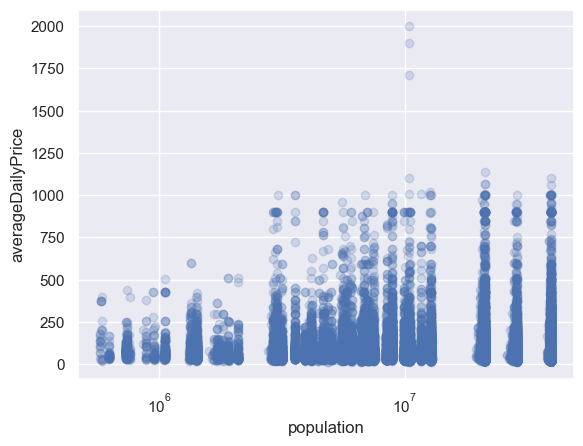

In [14]:
#Let's take a look to the relation between pop and daily rate.
splot = sns.regplot(x="population", y="averageDailyPrice", 
                    data=cars,
                    scatter_kws={'alpha':0.2},
                    fit_reg=False)
splot.set(xscale="log")

*3-Looking for Correlations*<br>
Since the dataset is not too large, you can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the corr() method:

In [15]:
df.corr()['averageDailyPrice'].sort_values(ascending=False)

averageDailyPrice        1.000000
longitude                0.043619
rating                   0.037493
freeDeliveryPromotion    0.020470
year                     0.020454
month                    0.000122
weekday                 -0.000274
latitude                -0.004859
scalar                  -0.025258
listingyear             -0.026896
instantBookDisplayed    -0.027249
newListing              -0.032399
id                      -0.039799
automaticTransmission   -0.045321
responseRate            -0.078285
renterTripsTaken        -0.152921
reviewCount             -0.156487
Name: averageDailyPrice, dtype: float64

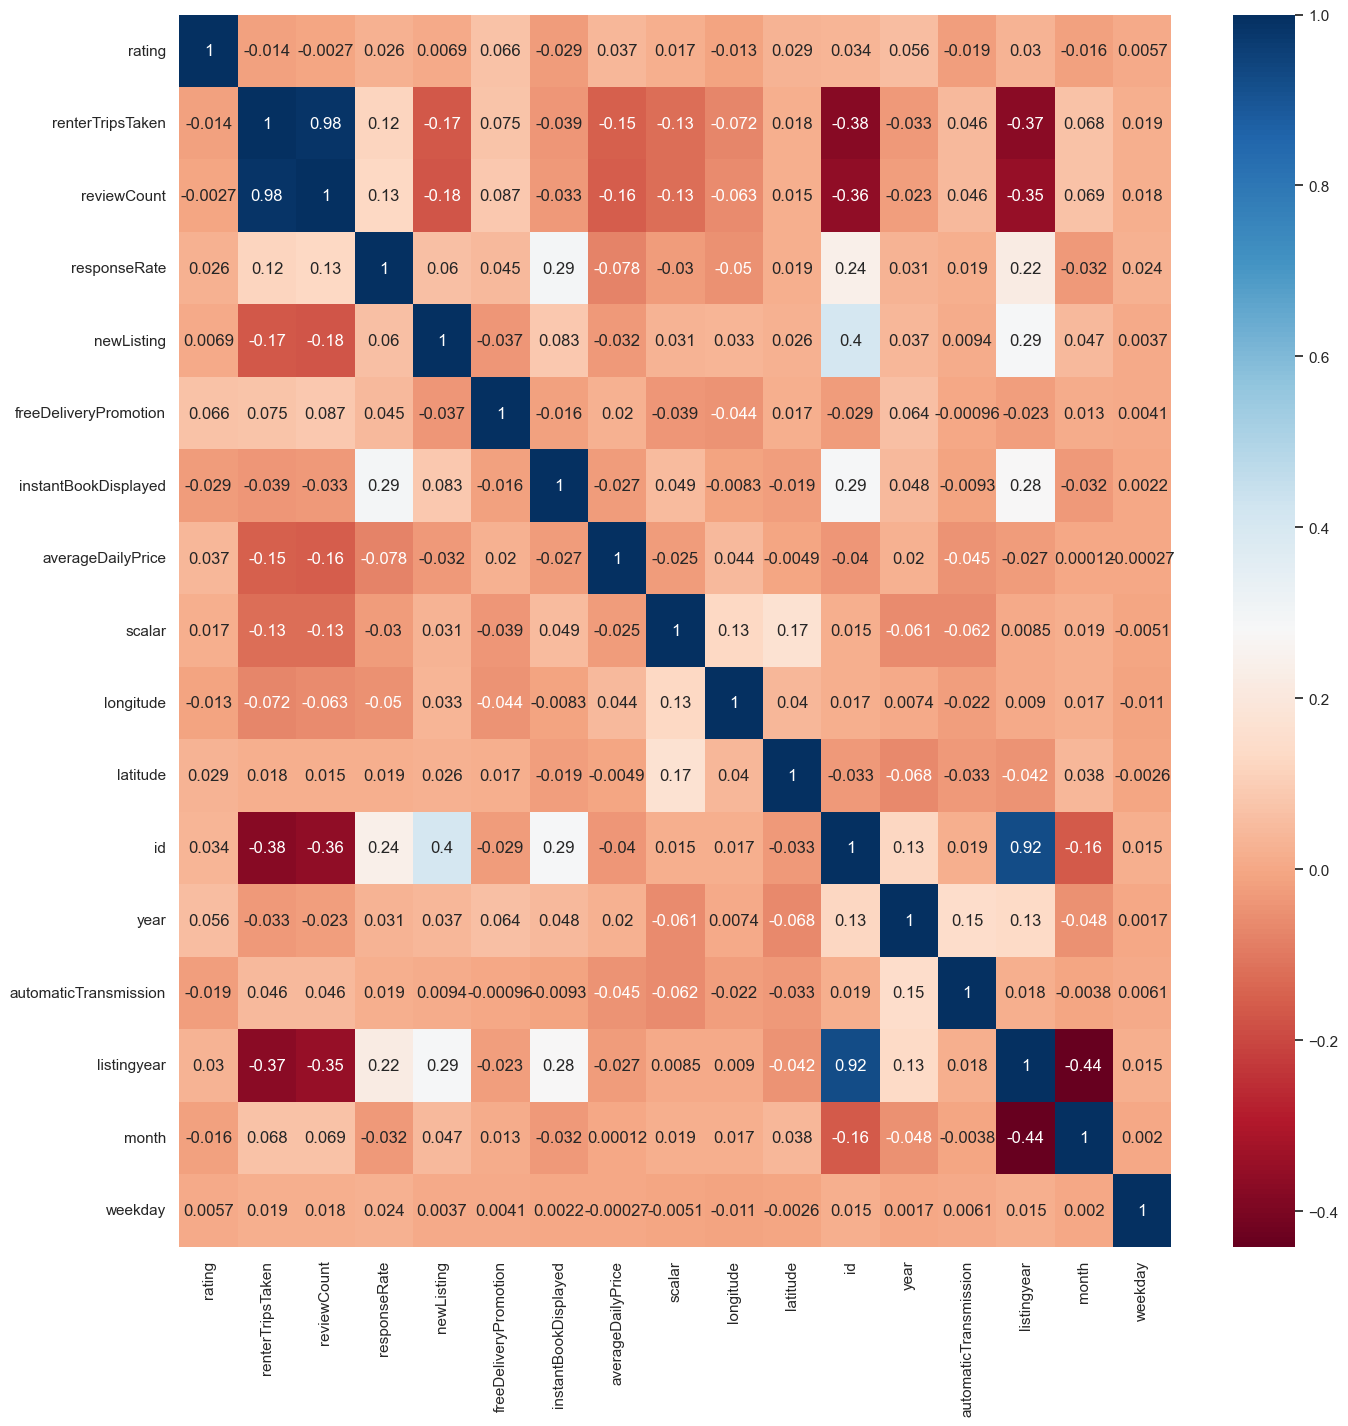

In [16]:
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

The correlation coefficient ranges from –1 to1. When it is close to 1, it means that there is a strong positive correlation. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the freeDeliveryPromotion and the averageDailyPrice value . Finally, coefficients close to zero mean that there is no linear correlation.

*4-Data Cleaning*<br>
missing data

In [17]:
cars.isnull().sum()

rating                   15219
renterTripsTaken             0
reviewCount                  0
responseRate              8434
newListing                   0
freeDeliveryPromotion        0
instantBookDisplayed         0
averageDailyPrice            0
scalar                       0
city                         0
longitude                    0
latitude                     0
state                        0
model                        0
make                         0
id                           0
listingCreatedTime           0
year                         0
type                         0
automaticTransmission        0
listingyear                  0
month                        0
weekday                      0
population                   0
dtype: int64

In [18]:
cars['responseRate'] = cars['responseRate'].fillna(0)

In [19]:
cars['rating'].fillna((cars['rating'].mean()), inplace=True)

*5-Features Selection :*
Important rule : If two features are highly correlated, both of their scores largely decrease, regardless of the quality of the features. therefore , we will drop city , state , reviewcount<br>
<br>
Listing Difference : This feature is an engineered feature, which represents the difference between the the year in which a car was listed on the website, and the year in which the car was released. Intuitively, if this difference is high, it should ideally mean that either this car is a classic (high rates), or is a really old car at the end of its lifetime.

In [20]:
cars['Listing Difference']=cars['listingyear']-cars['year']
cars.drop("listingCreatedTime", axis=1, inplace=True)
cars.head()

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,averageDailyPrice,scalar,city,...,make,id,year,type,automaticTransmission,listingyear,month,weekday,population,Listing Difference
0,4.873181,0,0,0.0,False,False,False,29.0,11,Iowa Falls,...,Ford,58905,2014,car,True,2014,7,0,3109504,0
1,5.000000,1,1,100.0,False,False,True,162.0,8,Marshall,...,Porsche,403202,2017,car,True,2018,4,5,5611179,1
2,4.873181,0,0,0.0,False,False,True,40.0,5,Colliers,...,Chevrolet,320436,2014,car,True,2017,9,3,1817048,3
3,3.750000,4,5,100.0,False,False,True,99.0,19,Moon,...,BMW,350460,2006,car,True,2017,11,3,12790447,11
4,4.873181,0,0,0.0,False,False,False,81.0,17,Pittsburgh,...,Ford,429146,2017,suv,True,2018,5,3,12807060,1


*6- Encoding Categorical Data*<br>
Replace Values Method<br>
This will be useful when the categories count is high and you don't want to type out each mapping. You will store the category names in a list called labels and then zip it to a seqeunce of numbers and iterate over it.<br>
<br>
Columns : [newListing , freeDeliveryPromotion , instantBookDisplayed , city , state, model , make ,type ,automaticTransmission]

In [21]:
labels = cars['type'].astype('category').cat.categories.tolist()
replace_map_comp  = {'type' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp )

{'type': {'car': 1, 'minivan': 2, 'suv': 3, 'truck': 4, 'van': 5}}


Use the replace() function on the DataFrame by passing the mapping dictionary as argument:

In [22]:
cars.replace(replace_map_comp, inplace=True)

Let's Create an Encoding Function

In [23]:
cat_coulmns=['newListing' , 'freeDeliveryPromotion' , 'instantBookDisplayed' , 'city' , 'state', 'model' , 'make' ,'type' ,'automaticTransmission']
def Encoding(df,coulmn_name):
    labels = df[coulmn_name].astype('category').cat.categories.tolist()
    replace_map_comp  = {coulmn_name : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

    #return replace_map_comp

    df.replace(replace_map_comp, inplace=True)
    return df.head()
    
for column in cat_coulmns:
    Encoding(cars,column)

In [24]:
cars.head(3)

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,averageDailyPrice,scalar,city,...,make,id,year,type,automaticTransmission,listingyear,month,weekday,population,Listing Difference
0,4.873181,0,0,0.0,1,1,1,29.0,11,1152,...,18,58905,2014,1,2,2014,7,0,3109504,0
1,5.000000,1,1,100.0,1,1,2,162.0,8,1496,...,45,403202,2017,1,2,2018,4,5,5611179,1
2,4.873181,0,0,0.0,1,1,2,40.0,5,513,...,10,320436,2014,1,2,2017,9,3,1817048,3


*7-Check data type*<br>
convert population from Object type to a int type

In [25]:
cars['population'] = pd.to_numeric(cars['population'], errors='coerce')
cars['population']=cars['population'].round().astype('Int64')

In [26]:
cars['population'].dtype

Int64Dtype()

In [29]:
cars.to_csv('./DataFeatures.csv')

In [27]:
cars.columns

Index(['rating', 'renterTripsTaken', 'reviewCount', 'responseRate',
       'newListing', 'freeDeliveryPromotion', 'instantBookDisplayed',
       'averageDailyPrice', 'scalar', 'city', 'longitude', 'latitude', 'state',
       'model', 'make', 'id', 'year', 'type', 'automaticTransmission',
       'listingyear', 'month', 'weekday', 'population', 'Listing Difference'],
      dtype='object')

In [30]:
cars1 = cars.drop(["city","state",'reviewCount','id','instantBookDisplayed'], axis=1).copy() 

*8-Detect Outliers*

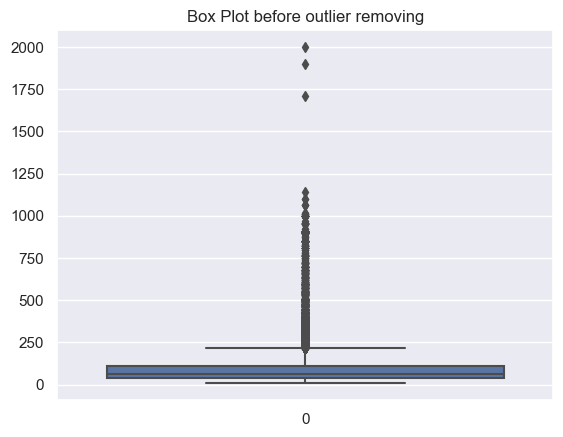

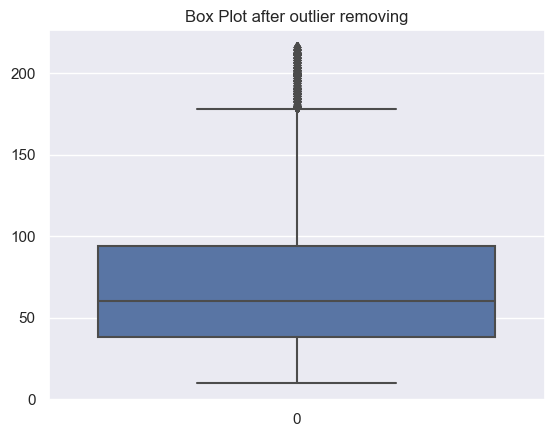

In [31]:
sns.boxplot(df['averageDailyPrice'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'averageDailyPrice')
sns.boxplot(df['averageDailyPrice'])
plt.title("Box Plot after outlier removing")
plt.show()

In [32]:
cars1.head(2)

,rating,renterTripsTaken,responseRate,newListing,freeDeliveryPromotion,averageDailyPrice,scalar,longitude,latitude,model,make,year,type,automaticTransmission,listingyear,month,weekday,population,Listing Difference
0,4.873181,0,0.0,1,1,29.0,11,-93.265547,42.522726,323,18,2014,1,2,2014,7,0,3109504,0
1,5.000000,1,100.0,1,1,162.0,8,-95.789869,44.433663,60,45,2017,1,2,2018,4,5,5611179,1


In [33]:
# Separating target variable and its features
y = cars1['averageDailyPrice']
X = cars1.drop('averageDailyPrice',axis=1)

*9-Data Scaling*

In [35]:
from sklearn.preprocessing import StandardScaler

# define standard scaler
scaler = StandardScaler()
# transform data
cars_main1 = scaler.fit_transform(X)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cars_main1, y, test_size=0.2, random_state=None)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (29023, 18)
x test:  (7256, 18)
y train:  (29023,)
y test:  (7256,)
